In [5]:
from pydub import AudioSegment
import numpy as np
import torch
from torchaudio.transforms import MelScale,Spectrogram
import matplotlib.pyplot as plt
import config
import torch.nn.functional as F

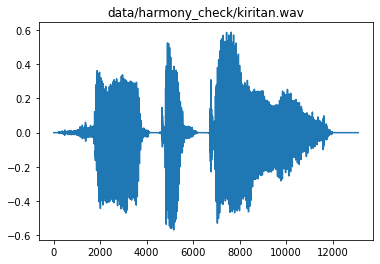

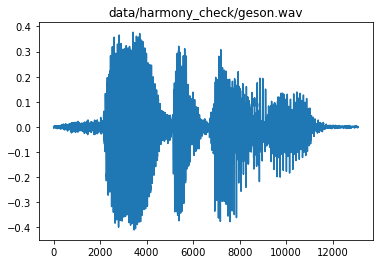

In [3]:
file1 = 'data/harmony_check/kiritan.wav'
file2 = 'data/harmony_check/geson.wav'
def readsound(file:str) -> np.ndarray:
    sound = AudioSegment.from_file(file)
    sound = sound.set_channels(config.channels)
    sound = sound.set_frame_rate(config.frame_rate)
    sound = sound.set_sample_width(config.sample_width)
    sound = np.array(sound.get_array_of_samples()) / config.sample_range
    return sound
sound1 = readsound(file1)
sound2 = readsound(file2)
plt.plot(sound1)
plt.title(file1)
plt.show()
plt.plot(sound2)
plt.title(file2)
plt.show()

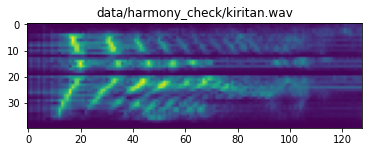

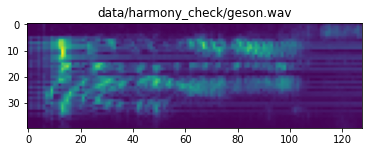

In [4]:
mel_scaler = MelScale(128,config.frame_rate,n_stft=config.fft_channels)
def DataProcess(sound:np.ndarray) -> torch.Tensor:
    sound = torch.from_numpy(sound)
    padlen = (config.overlap_length - (len(sound)%config.overlap_length))
    pad = torch.zeros(padlen,dtype=sound.dtype)
    sound = torch.cat([sound,pad]).unfold(0,config.recognize_length,config.overlap_length)
    sound = torch.fft.rfft(sound,dim=-1).abs().T.float()
    sound = mel_scaler(sound).T
    sound = torch.log1p(sound)
    return sound
sound1_t = DataProcess(sound1)
sound2_t = DataProcess(sound2)
plt.title(file1)
plt.imshow(sound1_t)
plt.show()
plt.title(file2)
plt.imshow(sound2_t)
plt.show()

In [7]:
F.mse_loss(sound1_t,sound2_t)

tensor(1.1478)

torch.Size([29, 321, 2])


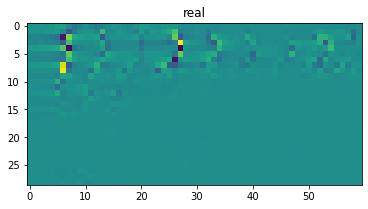

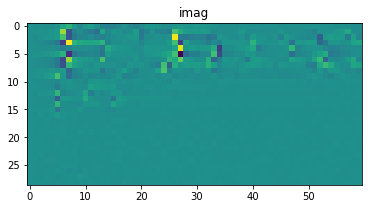

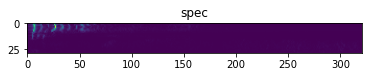

In [3]:
def DataProcess(sound:np.ndarray) -> torch.Tensor:
    sound = torch.from_numpy(sound)
    padlen = (config.overlap_length - (len(sound)%config.overlap_length))
    pad = torch.zeros(padlen,dtype=sound.dtype)
    sound = torch.cat([sound,pad]).unfold(0,config.recognize_length,config.overlap_length)
    sound = torch.fft.rfft(sound,dim=-1)
    return sound
sound1_fft = DataProcess(sound1)
sound1_ri = torch.view_as_real(sound1_fft)
sound1_r = sound1_ri[:,:60,0].squeeze()
sound1_i = sound1_ri[:,:60,1].squeeze()
print(sound1_ri.shape)
plt.title('real')
plt.imshow(sound1_r)
plt.show()
plt.title('imag')
plt.imshow(sound1_i)
plt.show()
plt.title('spec')
plt.imshow(sound1_fft.abs().float())
plt.show()

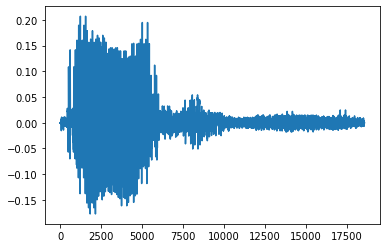

In [7]:
sound1_rin = sound1_ri / sound1_ri.abs().max()
sound1_n = torch.view_as_complex(sound1_rin)
sound1_n = torch.fft.irfft(sound1_n).view(-1)
plt.plot(sound1_n)
plt.show()

Text(0.5, 1.0, 'data/onnaotoko/onna3.wav')

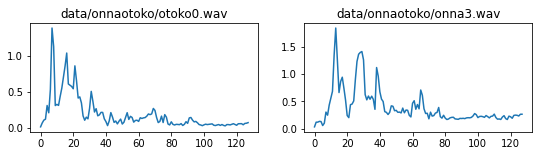

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(9, 2))
axs[0].plot(sound1_t[11])
axs[0].set_title(file1)
axs[1].plot(sound2_t[8])
axs[1].set_title(file2)

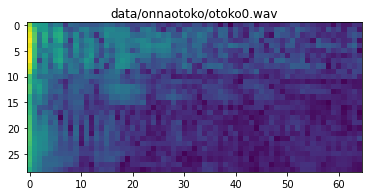

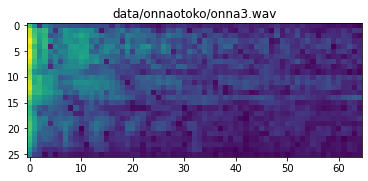

In [5]:
mel_scaler = MelScale(128,config.frame_rate,n_stft=config.fft_channels)
def DataProcess2(sound:np.ndarray) -> torch.Tensor:
    sound = torch.from_numpy(sound)
    padlen = (config.overlap_length - (len(sound)%config.overlap_length))
    pad = torch.zeros(padlen,dtype=sound.dtype)
    sound = torch.cat([sound,pad]).unfold(0,config.recognize_length,config.overlap_length)
    sound = torch.fft.rfft(sound,dim=-1).abs().T.float()
    sound = mel_scaler(sound).T
    sound = torch.log1p(sound)
    sound = torch.fft.rfft(sound,dim=-1).abs().float()
    sound = torch.log1p(sound)
    return sound
sound1_t2 = DataProcess2(sound1)
sound2_t2 = DataProcess2(sound2)
plt.title(file1)
plt.imshow(sound1_t2)
plt.show()
plt.title(file2)
plt.imshow(sound2_t2)
plt.show()

Text(0.5, 1.0, 'data/onnaotoko/onna3.wav')

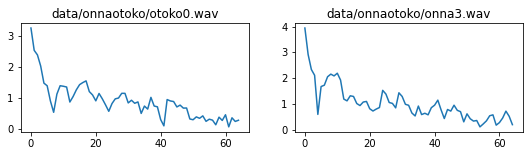

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(9, 2))
axs[0].plot(sound1_t2[11])
axs[0].set_title(file1)
axs[1].plot(sound2_t2[8])
axs[1].set_title(file2)

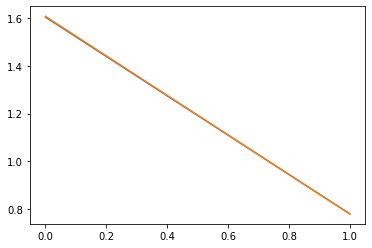

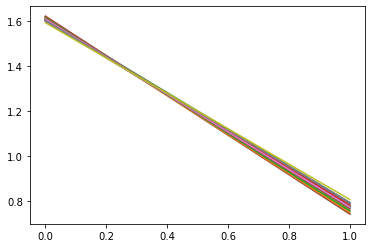

In [49]:
def N_FFT(sound:torch.Tensor,n:int) ->torch.Tensor:
    for _ in range(n):
        sound = torch.fft.rfft(sound,dim=-1).abs().float()
        sound = torch.log1p(sound)
    return sound
n = 7
sound1_tn = N_FFT(sound1_t,n)
sound2_tn = N_FFT(sound2_t,n)
plt.plot(sound1_tn[11])
plt.plot(sound2_tn[8])
plt.show()
for i in sound1_tn:
    plt.plot(i)
plt.show()

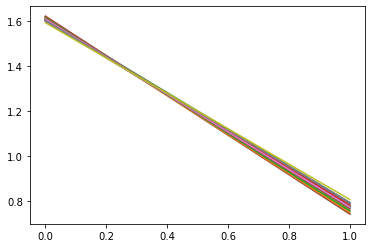

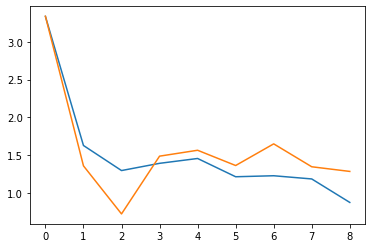

In [30]:
plt.plot(sound1_tn[11])
plt.plot(sound2_tn[8])

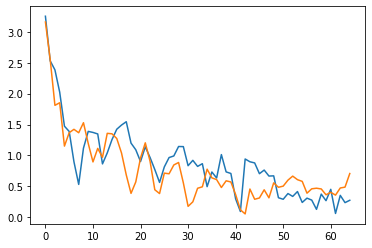

In [9]:
plt.plot(sound1_t2[11])
plt.plot(sound2_t2[8])
plt.show()